Alternative solution to exercise 1, which uses symbolic math to solve the differential equation

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.solvers.ode.systems import dsolve_system
from sympy import symbols,Eq,Function

Initializing constants

In [35]:
mu_0=4*np.pi*1e-7
h_bar=1.05457*1e-34
gamma_H=2.675e8
gamma_N=-2.716e7
B0=14.1
r12=1.1e-10
delta_iso=0
delta_iso_H=0
tau_c=1e-10

Elements of the relaxation matrix

In [4]:
omega_H,omega_N = -gamma_H*B0,-gamma_N*B0
delta_HN = -2*mu_0*gamma_H*gamma_N*h_bar/4/np.pi/(r12**3)
# intitial conditions
S_z0 = -1 # initital condition for S spin after inversion
S_zeq = 1 # thermal equilibrium
I_z0 = S_zeq*omega_H/omega_N # I spin in thermal equilibrium = I_z(eq)
I_zeq = I_z0
# elements of the relaxation matrix
J_tau = lambda omega: 2/5*tau_c/(1+(omega*tau_c)**2) # isotropic rotational tumbling 
G_Iz = (delta_HN/4)**2*(J_tau(omega_H-omega_N)+3*J_tau(omega_H)+\
    6*J_tau(omega_H+omega_N))+3/4*(omega_H*delta_iso_H)**2*J_tau(omega_H) # matrix elements of relaxation matrix
G_Sz = (delta_HN/4)**2*(J_tau(omega_H-omega_N)+3*J_tau(omega_N)+\
    6*J_tau(omega_H+omega_N))+3/4*(omega_N*delta_iso)**2*J_tau(omega_N)
G_IzSz = (delta_HN/4)**2*(-J_tau(omega_H-omega_N)+6*J_tau(omega_H+omega_N))

Coupled differential equations with symbolic math

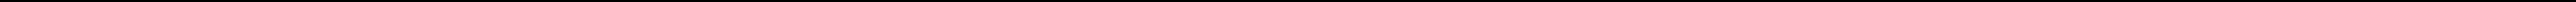

In [42]:
sympy.init_printing(use_unicode=True)
t,G00,G01,G10,G11=symbols('t G00 G01 G10 G11')
Iz,Sz=symbols('Iz Sz',cls=Function)

#integrated solver for coupled differential equations in sympy
G=-np.array([[G_Iz,G_IzSz],[G_IzSz,G_Sz]]) #Relaxation matrix
eqs=[Eq(Iz(t).diff(t),G00*(Iz(t)-I_zeq)+G01*(Sz(t)-S_zeq)),
     Eq(Sz(t).diff(t),G10*(Iz(t)-I_zeq)+G11*(Sz(t)-S_zeq))] #System of equations to solve
ics={Iz(0):I_z0,Sz(0):S_z0}
# Run the solver
dsolve_system(eqs,ics=ics)

In [45]:
print(soln)

[[Eq(Iz(t), 2*G01*G10*(G00*(9.84904270986745*G00**2 - G00*(19.6980854197349*G11 - 9.84904270986745*sqrt(G00**2 - 2*G00*G11 + 4*G01*G10 + G11**2)) + 39.3961708394698*G01*G10 + 9.84904270986745*G11**2 - 9.84904270986745*G11*sqrt(G00**2 - 2*G00*G11 + 4*G01*G10 + G11**2)) - G01*(G00**2 - G00*(2*G11 - sqrt(G00**2 - 2*G00*G11 + 4*G01*G10 + G11**2)) + 4*G01*G10 - 19.6980854197349*G10*sqrt(G00**2 - 2*G00*G11 + 4*G01*G10 + G11**2) + G11**2 + G11*sqrt(G00**2 - 2*G00*G11 + 4*G01*G10 + G11**2)))*exp(t*(G00 + G11 + sqrt(G00**2 - 2*G00*G11 + 4*G01*G10 + G11**2))/2)*Integral(exp(-t*(G00 + G11 + sqrt(G00**2 - 2*G00*G11 + 4*G01*G10 + G11**2))/2), t)/((-G00 + G11 + sqrt(G00**2 - 2*G00*G11 + 4*G01*G10 + G11**2))*sqrt(G00**2 - 2*G00*G11 + 4*G01*G10 + G11**2)*(G00**2 - G00*(2*G11 - sqrt(G00**2 - 2*G00*G11 + 4*G01*G10 + G11**2)) + 4*G01*G10 + G11**2 - G11*sqrt(G00**2 - 2*G00*G11 + 4*G01*G10 + G11**2))) + G01*G10*(-393961708394698.0*G00**7*Integral(exp(-0.5*G00*t)*exp(-0.5*G11*t)*exp(-1.0*t*sqrt(0.25*G00**2 